### Algorithm: CNN-1D including normalization
## Dataset: HMD
### Authors: Edgar Acuna  
### Created: April 2, 2025

In [308]:
import tensorflow

In [309]:
# cnn lstm model
from numpy import mean
from numpy import std, unique
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot

from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score, ConfusionMatrixDisplay
import tensorflow.keras.layers as layers
import keras
#from keras.layers import TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D, MaxPooling1D, LSTM, TimeDistributed
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical

In [310]:
import pandas as pd
from aeon.datasets import load_classification
from sklearn import preprocessing
from matplotlib import pyplot

def load_data(dataset, split="Train"):
    if split=="Train":
        X, y = load_classification(dataset, split="Train")
    else:
        X, y = load_classification(dataset, split="Test")
    print(" Shape of X = ", X.shape)
    print(" Shape of y = ", y.shape)
    #Swap dimensions so features are the third dimension
    X = X.swapaxes(1, 2)
    print(" New shape of X = ", X.shape)
    #prepare y
    y = pd.DataFrame(y)
    enc = preprocessing.OneHotEncoder(dtype=int)
    enc.fit(y)
    y = enc.transform(y).toarray()
    print(" New shape of y = ", y.shape)
    return X, y


In [311]:
# loading Training data
X, y = load_data("HandMovementDirection",split="Train")

 Shape of X =  (160, 10, 400)
 Shape of y =  (160,)
 New shape of X =  (160, 400, 10)
 New shape of y =  (160, 4)


In [312]:
import numpy as np
yo=np.argmax(y,axis=1)
yo=np.array(yo,dtype=int)
print(yo)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [313]:
# loading Testing data
Xt, yt = load_data("HandMovementDirection",split="Test")

 Shape of X =  (74, 10, 400)
 Shape of y =  (74,)
 New shape of X =  (74, 400, 10)
 New shape of y =  (74, 4)


In [314]:
Xtb=Xt

In [315]:
import numpy as np
Xb= np.concatenate((X, Xt),axis=0)
print(Xb.shape)

(234, 400, 10)


In [316]:
from sklearn.preprocessing import StandardScaler#
scaler = StandardScaler()
#tempo=X.reshape(X.shape[2],-1).T
#print(tempo.shape)
#X = scaler.fit_transform(X.reshape(X.shape[2], -1)).reshape(X.shape)
Xb = scaler.fit_transform(Xb.reshape(Xb.shape[2], -1)).reshape(Xb.shape)
#Xt = scaler.fit_transform(Xt.reshape(Xt.shape[2], -1)).reshape(Xt.shape)
#X1 = scaler.fit_transform(tempo)
#print(X)
#tempodf=pd.DataFrame(X1)
#print(tempodf.shape)
#pyplot.boxplot(tempodf)
#pyplot.show()

In [317]:
Xn1=Xb[0:160]
print(Xn1.shape)
Xn2=Xb[160:234]
print(Xn2.shape)

(160, 400, 10)
(74, 400, 10)


In [318]:
import time
#trainX, trainy, testX, testy = trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)
#print(trainX.shape)
#print("trainy",trainy.shape)
trainX=Xn1
trainy=y
testX=Xn2
testy=yt
verbose, epochs, batch_size = 0, 300, 32
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
print(n_timesteps,n_features,n_outputs)
model = Sequential()
model.add(Conv1D(64, 3, activation="relu", input_shape=(n_timesteps,n_features)))
model.add(MaxPooling1D(pool_size=3))
#model.add(Dropout(0.5))
model.add(Conv1D(128, 3, activation="relu", input_shape=(n_timesteps,n_features)))
model.add(MaxPooling1D(pool_size=3))
#model.add(Dropout(0.5))
model.add(Conv1D(512, 3, activation="relu", input_shape=(n_timesteps,n_features)))
model.add(MaxPooling1D(pool_size=3))
#model.add(Dropout(0.5))
model.add(Conv1D(1024, 3, activation="relu", input_shape=(n_timesteps,n_features)))
model.add(MaxPooling1D(pool_size=3))
#model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation = 'softmax'))
start_time = time.time()
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()
model.fit(trainX, trainy, epochs=300, batch_size=32, verbose=1)
#model.fit(xtrain, ytrain, batch_size=256,epochs=25,  validation_split=.2, verbose=1)
acc = model.evaluate(trainX, trainy)
print("Loss:", acc[0], " Accuracy:", acc[1])
print("Training time --- %s seconds ---" % (time.time() - start_time))

400 10 4


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_36 (Conv1D)              │ (None, 398, 64)        │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_36 (MaxPooling1D) │ (None, 132, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_37 (Conv1D)              │ (None, 130, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_37 (MaxPooling1D) │ (None, 43, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_38 (Conv1D)              │ (None, 41, 512)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_38 (MaxPooling1D) │ (None, 13, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_39 (Conv1D)              │ (None, 11, 1024)       │     1,573,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_39 (MaxPooling1D) │ (None, 3, 1024)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625,796 (10.02 MB)

 Trainable params: 2,625,796 (10.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.2543 - loss: 1.6274
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2204 - loss: 1.3963
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2937 - loss: 1.3877
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3376 - loss: 1.3819
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3092 - loss: 1.3743
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2692 - loss: 1.3654
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3765 - loss: 1.3488
Epoch 8/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7537 - loss: 1.2956
Epoch 9/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4967 - loss: 1.2273
Epoch 10/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6101 - loss: 1.0668
Epoch 11/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5801 - loss: 0.9617
Epoch 12/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7699 - lo

In [319]:
model.evaluate(testX, testy, verbose=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3824 - loss: 4.7736 


[4.461147308349609, 0.4054054021835327]

In [320]:
#Computing F1-score
import numpy as np
import sklearn
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score
train_features = np.array(trainX)
test_features = np.array(testX)
train_labels=np.array(trainy)
#train_labels=pd.DataFrame(trainy)
#n_values = train_labels.idxmax(axis=1)
y_values=np.argmax(train_labels,axis=1)
#print(y_values)
test_labels=np.array(testy)
yt_values=np.argmax(test_labels,axis=1)
#train_predictions_baseline = model.predict_classes(train_features, batch_size=150)
a=model.predict([test_features])
predict_classes=np.argmax(a,axis=1)
th=.8
atempo=a.max(axis=1)
print(atempo.shape)
print('Rate of Probability of classification exceeding a threshold in test',(atempo[atempo>th].shape[0])/atempo.shape[0])
#prob2=pd.DataFrame(model.predict_proba(test_features,batch_size=150))
#a=prob2.max(axis=1)
#print('Probability of classification',(a[a>.80].shape[0])/prob2.shape[0])
#print('Rate of Probability of classification exceding a trhershold',(a[a>.50].shape[0])/a.shape[0])
a1=model.predict([train_features])
predict_classes1=np.argmax(a1,axis=1)
#f1_train=sklearn.metrics.f1_score(ytrain, train_predictions_baseline, average="weighted")
#test_predictions_baseline = model.predict_classes(test_features, batch_size=150)
#print(test_predictions_baseline)
#f1_test=sklearn.metrics.f1_score(test_labels, test_predictions_baseline, average="weighted")
#print('f1_scores in testing set',f1_test)
#Calculating metrics for each class
print("EVALUATION ON TESTING DATA")
print(classification_report(yt_values, predict_classes))

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step

C:\Users\User\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_828
Received: inputs=('Tensor(shape=(32, 400, 10))',)

C:\Users\User\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_828
Received: inputs=('Tensor(shape=(None, 400, 10))',)



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
(74,)
Rate of Probability of classification exceeding a threshold in test 0.7297297297297297
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.38      0.53      0.44        15
           1       0.69      0.37      0.48        30
           2       0.37      0.47      0.41        15
           3       0.22      0.29      0.25        14

    accuracy                           0.41        74
   macro avg       0.41      0.41      0.40        74
weighted avg       0.47      0.41      0.41        74



In [321]:
cm=confusion_matrix(yt_values, predict_classes)
print(cm)
good=np.diag(cm)/np.unique(yt_values,return_counts=True)[1]
print(good)

[[ 8  2  2  3]
 [ 5 11  7  7]
 [ 2  2  7  4]
 [ 6  1  3  4]]
[0.53333333 0.36666667 0.46666667 0.28571429]


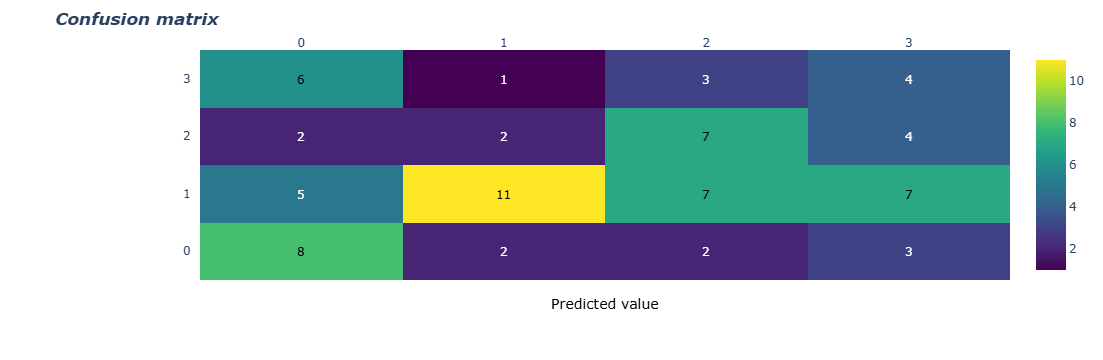

In [322]:
import plotly.figure_factory as ff
# invert z idx values

z= cm

# invert z idx values
#z = z[::-1]

x= [0,1,2,3]
y1=x
#y =x[::-1].copy() # invert idx values of x
#print(y)
#y=x
# change each element of z to type string for annotations
z_text = [[str(y1) for y1 in x] for x in z]

# set up figure
fig = ff.create_annotated_heatmap(z, x=x, y=y1, annotation_text=z_text, colorscale='Viridis')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Actual value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()

In [323]:
results1=model.evaluate(Xtb, yt, verbose=1)
print(results1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4300 - loss: 648.3857
[605.01220703125, 0.44594594836235046]
